In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
autoencoder_data = pd.read_feather("autoencode_data.feather").set_index(['trade_time','code'])
autoencoder_data.head()

,,factor_0,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,factor_8,factor_9,...,factor_119,factor_120,factor_121,factor_122,factor_123,factor_124,factor_125,factor_126,factor_127,nxt1_ret_5h
trade_time,code,,,,,,,,,,,,,,,,,,,,,
2024-12-05 10:42:00,IM,-0.053643,0.007503,0.005101,-0.081432,-0.000423,0.016134,-0.008849,0.014266,-0.006310,0.018663,...,0.027020,-0.117705,0.014726,-0.019864,0.005731,0.041764,-0.031198,-0.003759,0.022929,-0.000596
2024-12-05 10:43:00,IM,-0.052751,0.009240,0.005295,-0.079972,-0.000442,0.016076,-0.011234,0.015306,-0.005891,0.019048,...,0.026484,-0.110291,0.014578,-0.018927,0.005455,0.041422,-0.029848,-0.002969,0.022684,-0.002093
2024-12-05 10:44:00,IM,-0.050913,0.009819,0.005002,-0.077957,0.000150,0.016164,-0.009178,0.015544,-0.004165,0.019350,...,0.026530,-0.110620,0.014688,-0.018616,0.005552,0.042213,-0.029181,-0.002341,0.023113,-0.000537
2024-12-05 10:45:00,IM,-0.236879,0.014973,-0.001106,0.056107,0.032793,0.010208,0.034202,0.039624,-0.125924,-0.014545,...,0.023068,-0.044999,0.013325,-0.011077,-0.005951,0.063189,-0.011460,0.011957,0.025512,0.000592
2024-12-05 10:46:00,IM,0.309981,0.612907,-0.146980,1.932868,0.165070,0.002405,-0.088080,0.066229,-0.232749,-0.002264,...,-0.002205,-0.120253,0.002975,-0.023241,-0.027623,0.037246,-0.016778,0.001095,0.006472,0.000712


In [3]:
original_data = pd.read_feather("original_data.feather").set_index(['trade_time','code'])
original_data.head()

,,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,nxt1_ret_5h
trade_time,code,,,,,,,,,,,,,,,,,,,,,
2024-12-04 10:43:00,IM,0.182540,0.042358,-0.001258,0.033082,0.160221,0.183845,0.082098,0.006431,-0.027652,0.116465,...,0.022762,0.359305,0.229185,0.183744,0.350293,0.191656,0.400573,0.270662,0.022762,-0.000850
2024-12-04 10:44:00,IM,-0.022138,0.210615,0.067715,0.200253,0.076836,0.486118,0.122046,0.179953,0.243458,0.146718,...,0.098649,0.415487,0.293364,0.121029,0.304335,0.069644,0.434226,0.078266,0.098649,-0.000477
2024-12-04 10:45:00,IM,-0.387424,0.081613,0.078933,0.069492,0.091257,0.315212,0.140209,0.094518,-0.011762,0.144334,...,0.190128,0.422329,0.460933,0.196927,0.325593,0.167395,0.433723,0.167863,0.190128,-0.001953
2024-12-04 10:46:00,IM,-0.554890,0.097830,-0.031260,0.081340,0.144897,0.205027,0.027762,0.073933,0.098749,-0.051559,...,-0.028780,0.294990,0.139180,-0.004641,0.259340,0.100351,0.356003,-0.048724,-0.028780,-0.003197
2024-12-04 10:47:00,IM,-0.305727,-0.214194,-0.225590,-0.236621,-0.162809,0.032056,-0.256779,-0.290297,-0.427306,-0.253569,...,-0.435438,0.119225,-0.373144,-0.391934,0.069808,-0.256521,0.234297,-0.458890,-0.435438,-0.003587


In [4]:
returns_data = autoencoder_data[['nxt1_ret_5h']]
returns_data.head()

,,nxt1_ret_5h
trade_time,code,
2024-12-05 10:42:00,IM,-0.000596
2024-12-05 10:43:00,IM,-0.002093
2024-12-05 10:44:00,IM,-0.000537
2024-12-05 10:45:00,IM,0.000592
2024-12-05 10:46:00,IM,0.000712


In [5]:
autoencoder_data = autoencoder_data.drop(['nxt1_ret_5h'],axis=1)
original_data = original_data.drop(['nxt1_ret_5h'],axis=1)

In [6]:
autoencoder_data = autoencoder_data.mean(axis=1)
original_data = original_data.mean(axis=1)

In [8]:
autoencoder_data.name = "auto"
original_data.name = "original"

In [10]:
autoencoder_data = pd.concat([autoencoder_data,returns_data],axis=1).reset_index()
original_data = pd.concat([original_data,returns_data],axis=1).reset_index()

In [11]:
from lib.cux001 import FactorEvaluate1

In [14]:
evaluate1 = FactorEvaluate1(factor_data=autoencoder_data,
                                factor_name='auto',
                                ret_name='nxt1_ret_{0}h'.format(5),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression='autoencoder')
evaluate1.run()

{'total_ret': 0.2275855869160246,
 'avg_ret': 1.405216899523385e-05,
 'max_dd': -0.053650730261102786,
 'calmar': 4.241984886476485,
 'sharpe1': 0.02189850335186219,
 'sharpe2': 2.777711547461475,
 'turnover': 0.24860756985462784,
 'win_rate': 0.4957804505282743,
 'profit_ratio': 1.079103660298885,
 'ic_mean': 0.010561460058798721,
 'ic_std': 0.08395680847469016,
 'ic_ir': 0.12579634994084615,
 'factor_autocorr': 0.34646051260415783,
 'ret_autocorr': 0.8179596058313449}

In [18]:
evaluate2 = FactorEvaluate1(factor_data=original_data,
                                factor_name='original',
                                ret_name='nxt1_ret_{0}h'.format(5),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression='original')
evaluate2.run()

{'total_ret': 0.19038844952261957,
 'avg_ret': 1.181246959757361e-05,
 'max_dd': -0.056096669363590146,
 'calmar': 3.3939349997522714,
 'sharpe1': 0.017383979602720968,
 'sharpe2': 2.4291389034232975,
 'turnover': 0.2265874552347724,
 'win_rate': 0.49005756148613294,
 'profit_ratio': 1.0632435678158783,
 'ic_mean': 0.019890994009425525,
 'ic_std': 0.08352171557404704,
 'ic_ir': 0.23815356129497792,
 'factor_autocorr': 0.6275389177016066,
 'ret_autocorr': 0.8179596058313449}

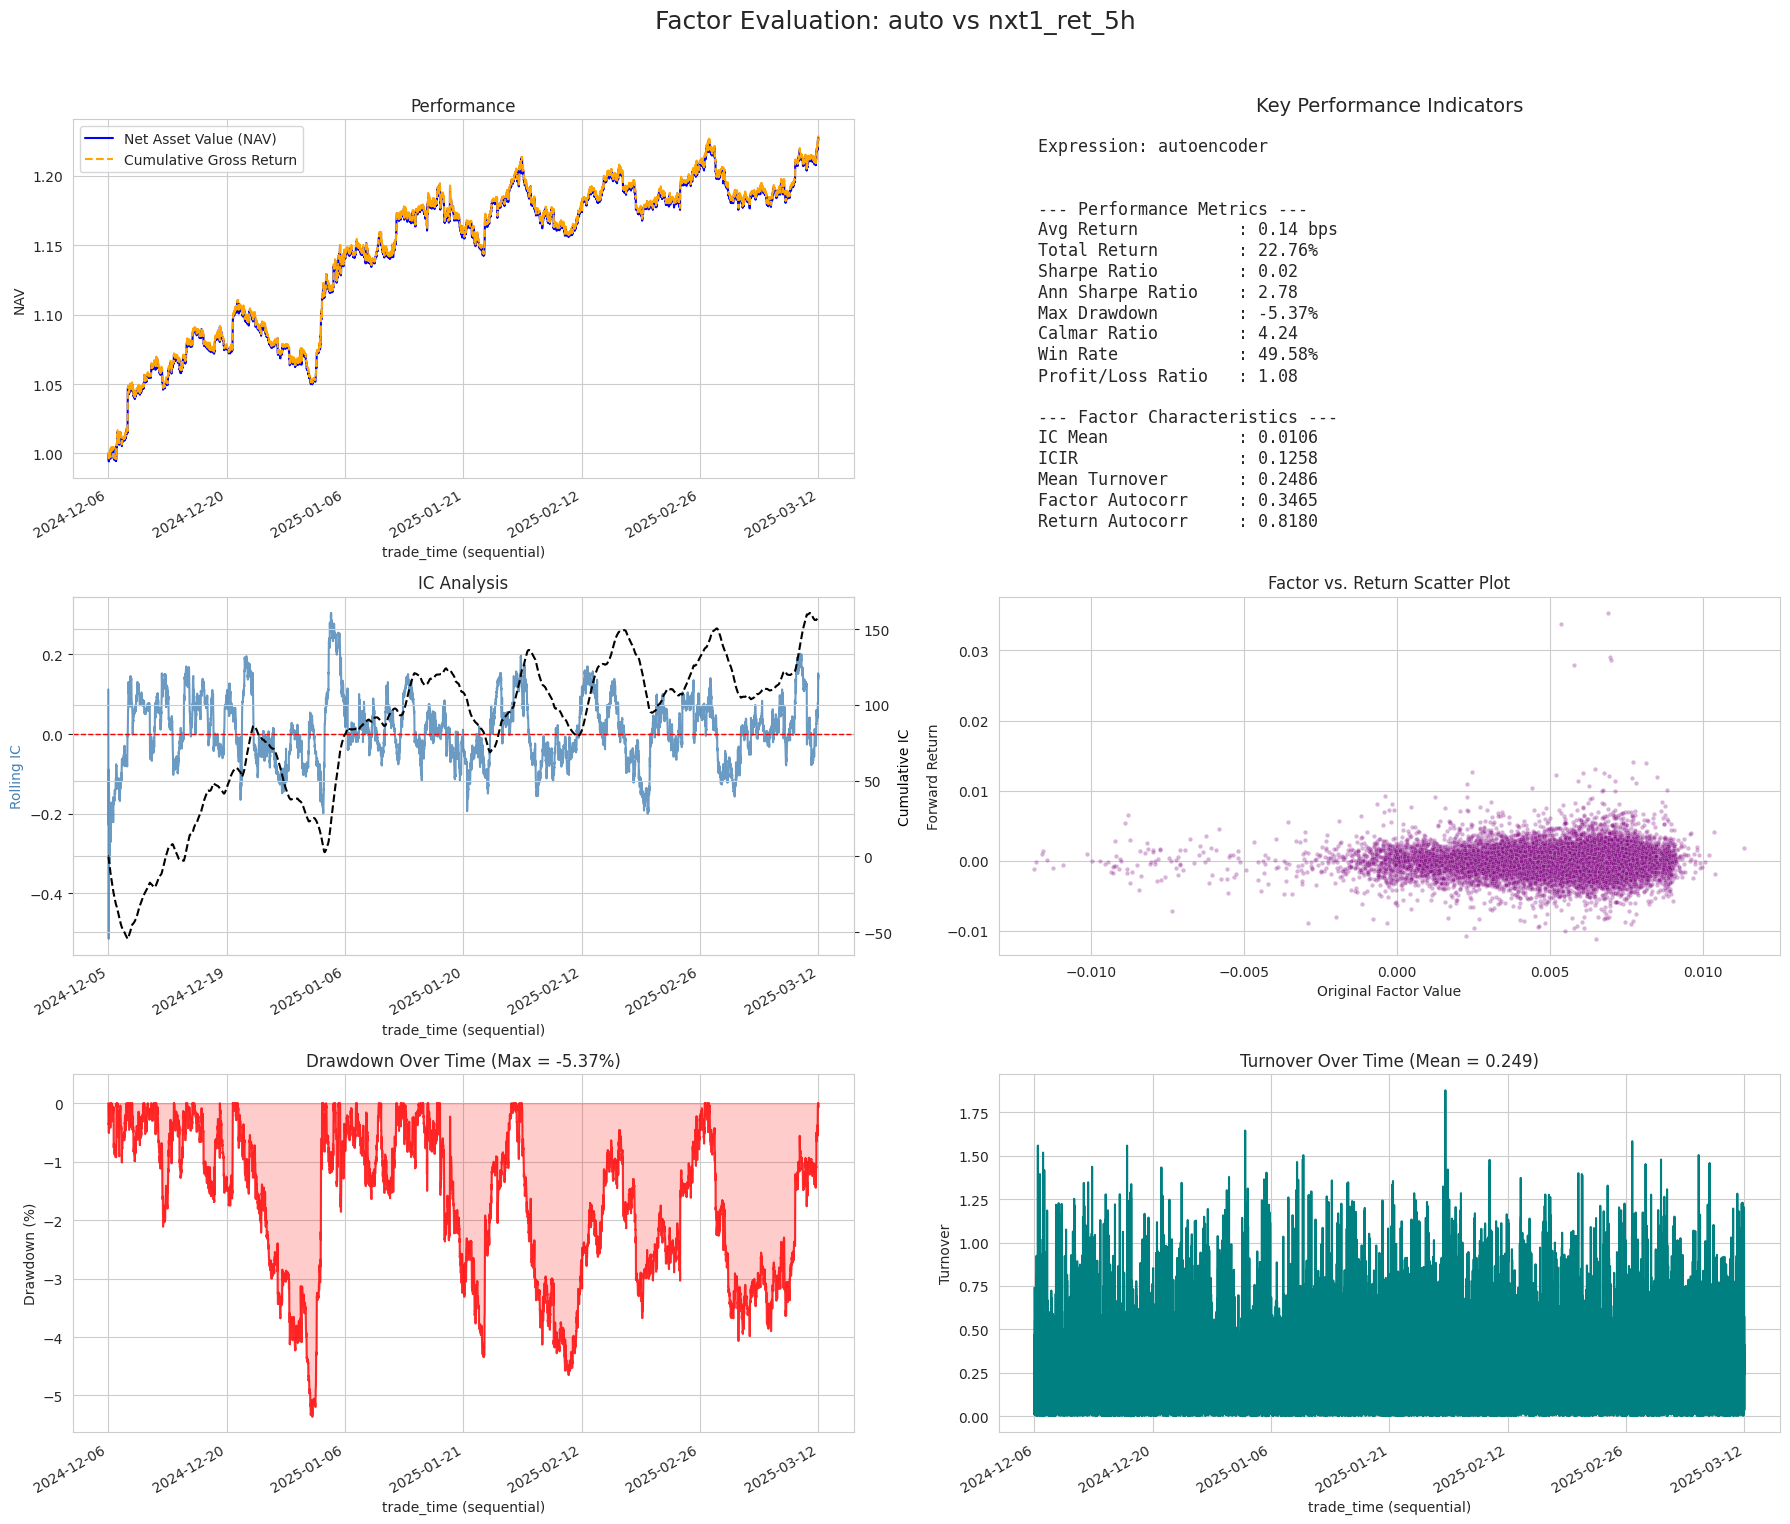

In [16]:
evaluate1.plot_results()

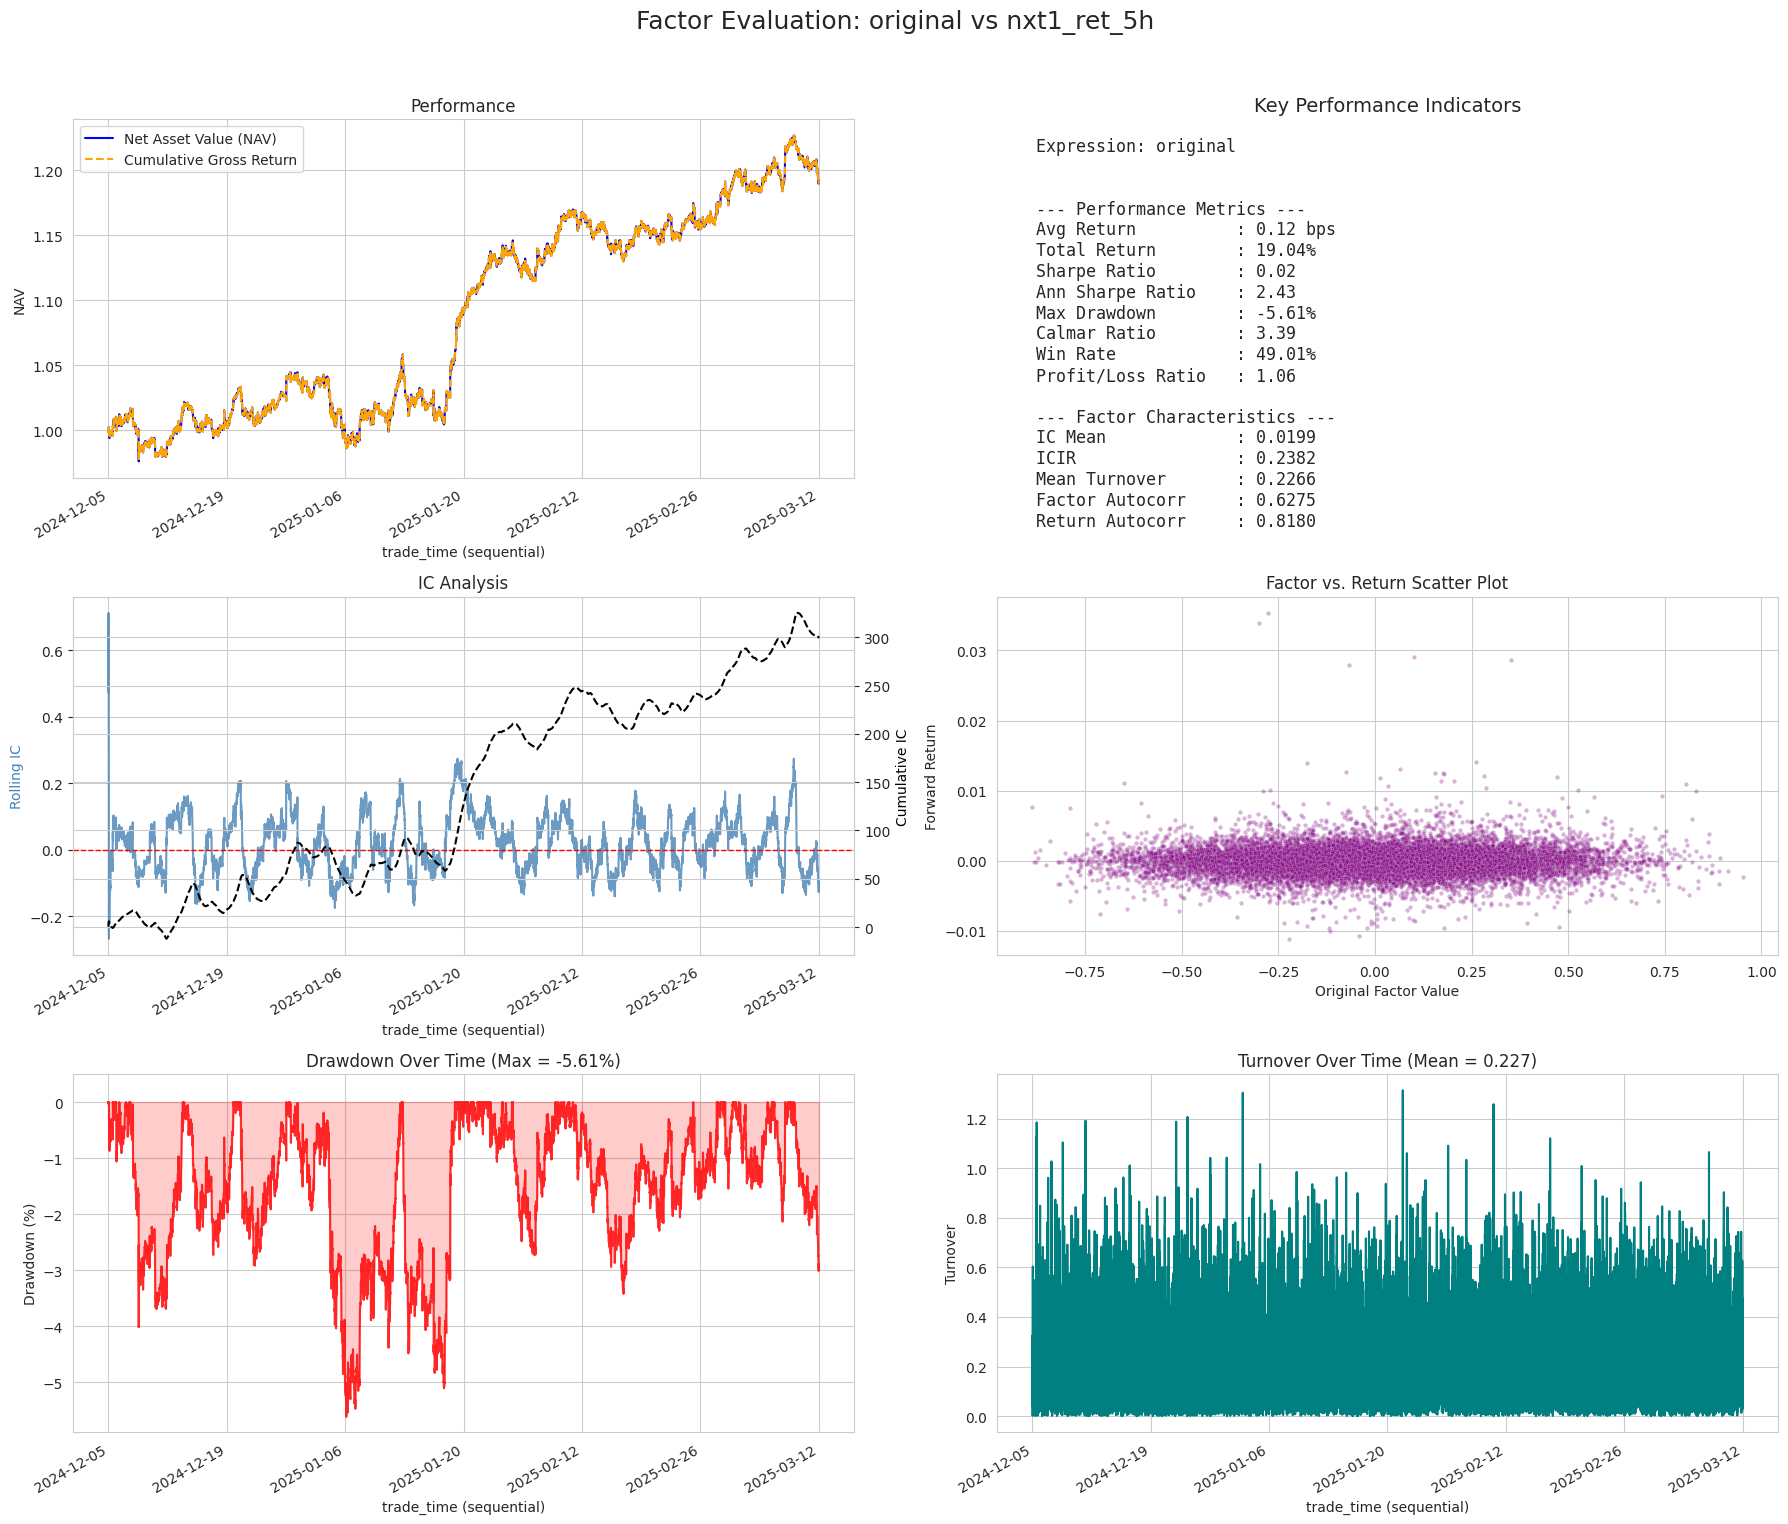

In [19]:
evaluate2.plot_results()